# Project title: Bank Customer Churn Classification


## Problem Statement: Predicting if a Customer will exit bank or not from the given Bank Customer data.

## 1.0 Business Understanding

The Banking Inducstry has experienced massive growth over the years and with many new high tech entrants, competition has also increased tremendously.

There are limitless number of options where customers can put their money, from traditional Banks to online solid startups. To understand how your customers are likely to behave will equip the bank in addressing issues that in the first place cause them to leave.

Customer experience or customer service has been cited as the number one reason why clients move banks followed by unfavourable fees among other reasons such as lack of new digital products.

Once customers leave, it is hard to get them back. For this reason post event analysis will only give reasons why they left and cannot prevent the action from happening. However, with the help of AI, we can use the same data to predict who might leave and therefore have an opportunity to seek to understand why.

For most companies, the customer acquisition cost (cost of acquiring a new customer) is higher than the cost of retaining an existing customer. Therefore, the challenge of implementing a successful churn project is to increase customer loyalty and, consequently, increase company revenue.

It is therefore neccessary to analyze data of customers who left to find insights which might help us predict the ones who are likely to leave and develop plans to reduce these number.

## 2.0 Data Understanding

##### Creating a Churner Profile and Identifying Churn Behavior

In trying to gain insights into the data, I create visual representations that aggregate and summarize the following:

    1. Creating Customer Segmentation based on behavior, characteristics, patterns and address the question, "Which Customer do we care about? The best vs the most valuable.
    2. Compare to Control population: Understanding one time customers vs regular engaged ones
    3. Identifying what makes your Churner different

##### Implementing the Churn Scoring Mechanism

In looking for a solution, I determine the best approach and algorithms by first:

    1. Finding relevant features, then
    2. Computing a Churn Score
    

### Feature description¶
#### Bank client data:

    1 - ID (numeric)
    2 - Surname (String)
    3 - age (numeric)
    4 - Credit Score (Numeric)
    5 - Geographical Area : (categorical: 'France', 'German', 'Spain')
    6 - Gender : (categorical: 'Male' or 'Female')
    7 - Tenure : Number of years member has been with Bank (Numeric)
    8 - Balance: Amount in Account (Numeric)
    9 - NumofProducts: Number of Products member has with Bank (Numeric)
    
#### Other Attributes:

    10 - HasCrCard: Has Credit Card (binary: '1 = yes',0 = 'no')
    11 - IsActiveMember: Is Member Still current Account Holder (binary: '1 = yes',0 = 'no')
    12 - EstimatedSalary: Estimated Salary (Numeric)
    

#### Output variable (desired target):

    13 - y - has the client Exited? (binary: '1 = yes',0 = 'no')

In [ ]:
!python -m pip install scikit-learn==0.22.0 --user

In [1]:
# Importing Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
sns.set()

import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

# Required to make it work in Google Colab
from plotly import __version__

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

cf.go_offline()

Setting Notebook Mode to False

In [2]:
init_notebook_mode(connected=False)

In [2]:
# training dataset import
#cust_data = pd.read_csv("C:\\Users\\Welcome\\PROF790\\Bank_Churn\\Churn_Modelling.csv")
cust_data = pd.read_csv("Churn_Modelling.csv")
cust_data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

# Load Data For Colab

In [4]:
#The train dataset is then uploaded from the files and saved for reading and further analysis
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [0]:
import io
cust_data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
# Dataset is now stored in a Pandas Dataframe

In [3]:
cust_data.shape

(10000, 14)

In [4]:
cust_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### Percentage of Exited Customers Vs Remaining

In [5]:
# Percentage per category for the target column.
percentage_labels = cust_data['Exited'].value_counts(normalize = True) * 100
percentage_labels

0    79.63
1    20.37
Name: Exited, dtype: float64

Note: Of the 10,000 Bank Customer data provided, 20.37% of them Left the Bank 

#### EDA: How does the provided data Features Correlate?

In [6]:
# Drop the irrelevant columns  as shown above
cust_data = cust_data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Build correlation matrix
corr = cust_data.corr()
corr.style.background_gradient(cmap='PuBu')

##### Note
The graphical analysis shows all values are very small and less than +0.5 or -0.5. We can therefore say features are not correlated.

In [7]:
#price range correlation
corr.sort_values(by=["CreditScore"], ascending=False).iloc[0].sort_values(ascending=False)

CreditScore        1.000000
IsActiveMember     0.025651
NumOfProducts      0.012238
Balance            0.006268
Tenure             0.000842
EstimatedSalary   -0.001384
Age               -0.003965
HasCrCard         -0.005458
Exited            -0.027094
Name: CreditScore, dtype: float64

#### Taking a look at how Data is Distributed using Scatter Plots

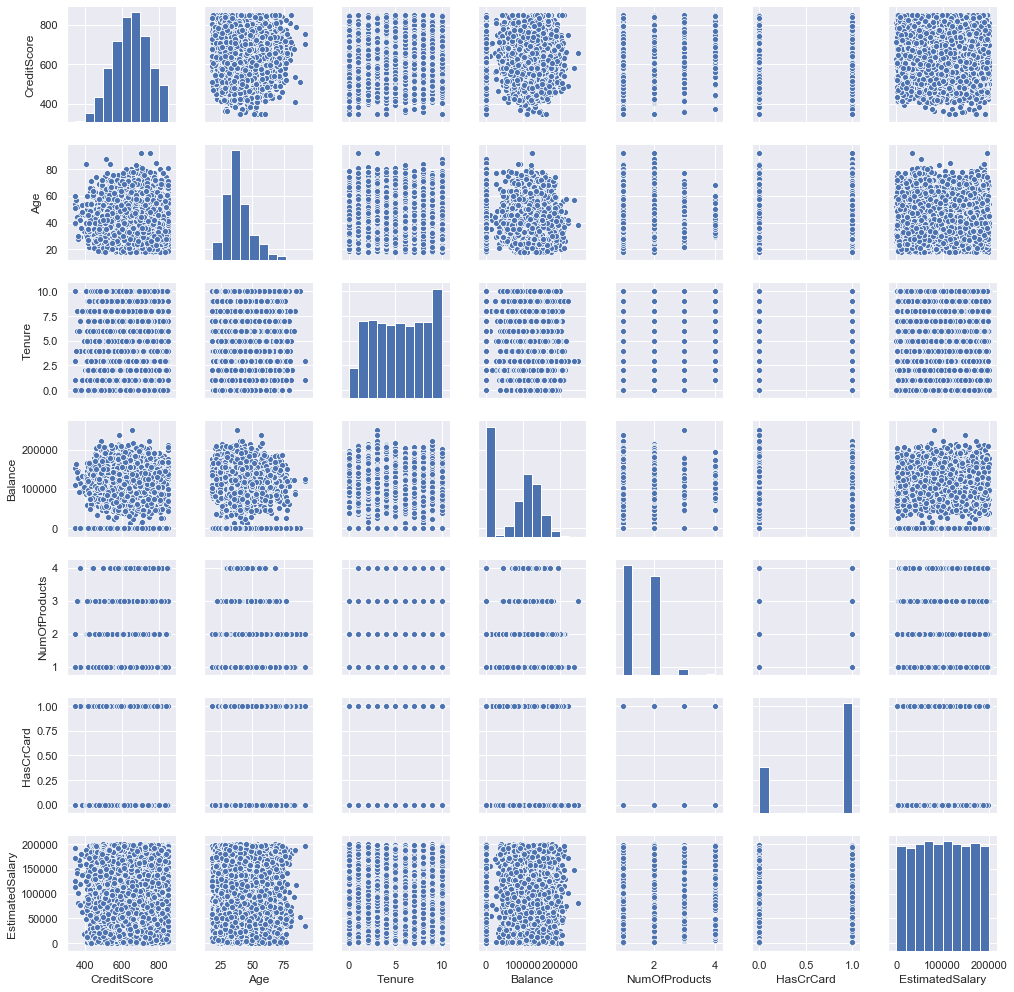

In [8]:
#scatterplot
sns.set()
cols_pr = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'EstimatedSalary']
sns.pairplot(cust_data[cols_pr], height = 2.0)
plt.show()

###### Deductions:
    Credit Score seems to be normally distributed while
    There are high number of customers with low balances and
    Most Customers either have one or two bank products.

#### Checking for Missing Data
There some algorithms that can't handle missing data or may perform poorly when present with such data.
We check and appropriate handle any missing values for that matter.

In [9]:
#missing data
total_null = cust_data.isnull().sum().sort_values(ascending=False)
percent_null = (cust_data.isnull().sum()/cust_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])

missing_data

Total  Percent
Exited               0      0.0
EstimatedSalary      0      0.0
IsActiveMember       0      0.0
HasCrCard            0      0.0
NumOfProducts        0      0.0
Balance              0      0.0
Tenure               0      0.0
Age                  0      0.0
Gender               0      0.0
Geography            0      0.0
CreditScore          0      0.0

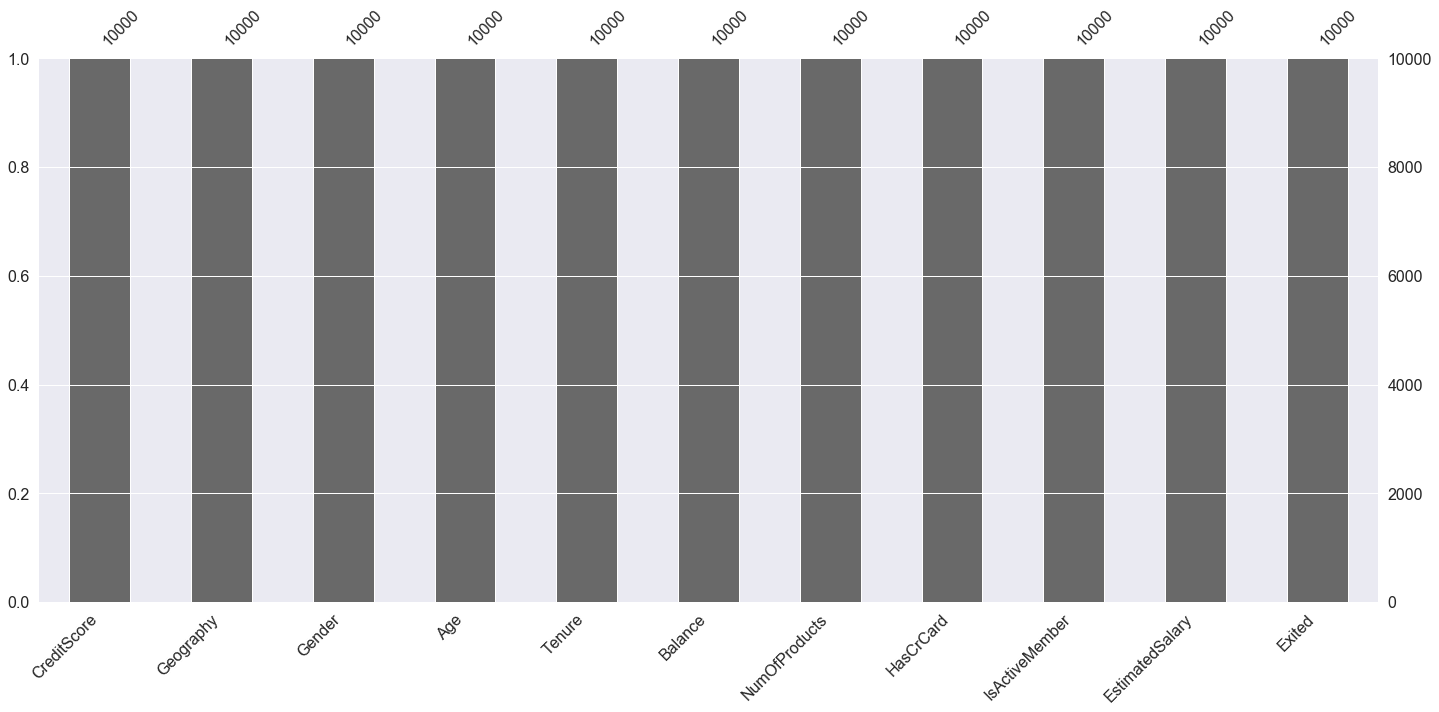

In [10]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(cust_data)

plt.show()

#### Inspecting for Ouliers

In [11]:
cust_data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

### Data Visualization

#### Distribution by Geographical Area

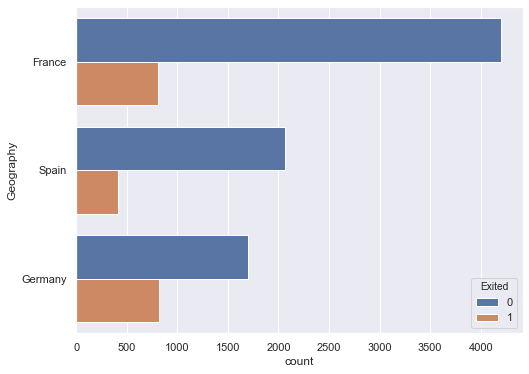

In [12]:
from itertools import chain
countmale = cust_data[cust_data['Gender']=='Male']['Gender'].count()
countfemale = cust_data[cust_data['Gender']=='Female']['Gender'].count()    
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sns.countplot(hue='Exited',y='Geography',data=cust_data)

Note:
    0 = 'Male'
    1 = 'Female'

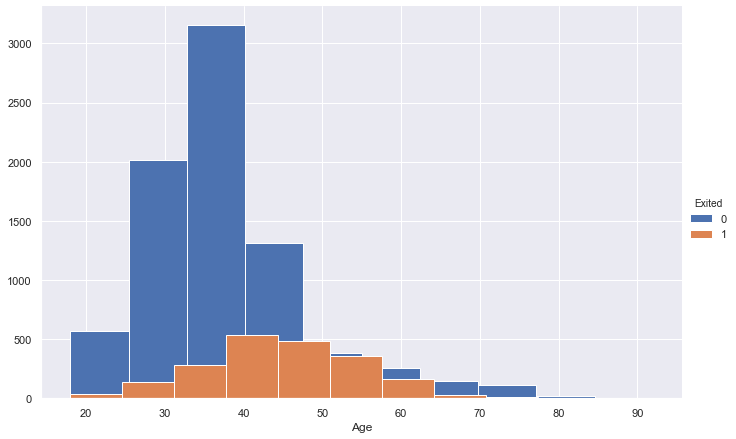

In [13]:
from matplotlib import rcParams

# figure size in inches
#rcParams['figure.figsize'] = 11.7,8.27

g = sns.FacetGrid(cust_data,hue = 'Exited', height = 6.27, aspect=9.7/6.27)
(g.map(plt.hist,'Age',edgecolor="w").add_legend())

###### Note: 
Legend -  1 = 'Yes', 0 = 'No'

###### Observation:

From above graph, Current Customer Age data  distribution is skewed to the left meaning more younger generation tend to stick with the bank.

Text(0.5, 0, 'Credit Score')

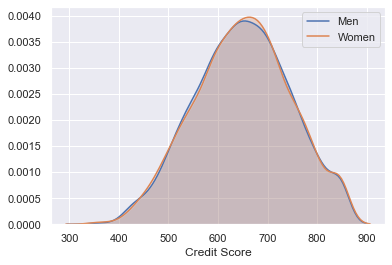

In [14]:
sns.kdeplot(cust_data.CreditScore[cust_data.Gender=='Male'], label='Men', shade=True)
sns.kdeplot(cust_data.CreditScore[cust_data.Gender=='Female'], label= 'Women', shade=True)
plt.xlabel('Credit Score')

###### Note: 
    Credit Score data tends to be normally distributed both in men and women

Text(0.5, 0, 'Exited')

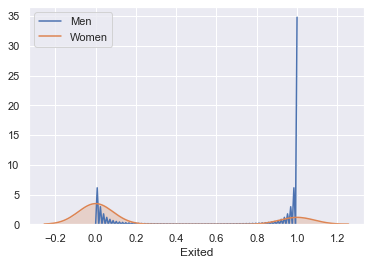

In [15]:
sns.kdeplot(cust_data.Exited[cust_data.Gender=='Male'], label='Men', shade=True)
sns.kdeplot(cust_data.Exited[cust_data.Gender=='Female'], label= 'Women', shade=True)
plt.xlabel('Exited')

In [16]:
# Drop the irrelevant columns  as shown above
training_data = cust_data

In [17]:
training_data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [18]:
#Separating churn and non churn customers
churn     = training_data[training_data["Exited"] == 1]
not_churn = training_data[training_data["Exited"] == 0]

In [19]:
target_col = ["Exited"]
cat_cols   = training_data.nunique()[training_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in training_data.columns if x not in cat_cols + target_col]

Setting Display Function for Colab

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [20]:
# Setting to Allow for Colab Display of interactive Plots
configure_plotly_browser_state()

# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )

new_df = training_data[num_cols[:1]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

###### Note:
    Credit Score data is normally didtributed but with a concentration of low Credit Score for substantial number 
    of customers

In [21]:
configure_plotly_browser_state()

# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = training_data[num_cols[1:3]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

###### Note:
    While the lower age limit for banking is determined by law and pegged at minimum age of 18, there is no upper age limit and Banks have a good number of Customer well past the upper quartle of Age 63 years.

#### Distribution of Continous Variables

In [22]:
#function  for histogram for customer churn types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non Churn Customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " Distribution in Customer Attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data = data,layout=layout)
    
    py.iplot(fig)

In [23]:
configure_plotly_browser_state()

# Calling the function for plotting the histogram for creditscore column 
histogram(num_cols[0])

###### Note:
    It is good to note that a section of Customers with very good Credit Card Score also churn.
    
    We can hypothesize that, Banks compete for these High value Customers and therefore are likely to be given great offers by competing banks to join them.

In [24]:
configure_plotly_browser_state()

# Calling the function for plotting the histogram for creditscore column 
# Pass the mouse hover the graph for more information. 
histogram(num_cols[1])

###### Note:
    From the above graph, Bank Customers who churn tend to be older compared to those who do note.
    
###### Hypothesis:
    
    1. Older Customers tend to look for value adding products from their Banks and if not available they can easily switch Banks.
    2. Older Customers are a very busy lot and value their time and therefore poor customer service can easily drive them away.

In [25]:
configure_plotly_browser_state()

# Calling the function for plotting the histogram for balance column 
histogram(num_cols[3])

###### Note:
    There is an abnormaly high number of customers with very low Bank Balance who exited the Bank
    
###### Hypothesis:
    We can hypothesize that customers with very low balances have less attachment and trust in the bank and therefore much easier to detach.

In [26]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " Distribution in Customer Attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [27]:
configure_plotly_browser_state()

# Calling the function for plotting the pie plot for geography column
plot_pie(cat_cols[0])

###### Note: 
    Percentage wise, Spain had 20.3% at half the %age of those who exited than that of Germany and France 

In [28]:
configure_plotly_browser_state()

# Calling the function for plotting the pie plot for gender column
plot_pie(cat_cols[1])

##### Note:
    Female Customers are the ones who are most likely to leave the Banks.

## 3.0 Data Preparation & Preprocessing

In [29]:
cust_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [30]:
cust_data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

#### Splitting the Independent and Dependent (Target) variables

In [31]:
X_columns = cust_data.columns.tolist()[0:10]
y_columns = cust_data.columns.tolist()[-1:]
print(f'All columns: {cust_data.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


In [32]:
X = cust_data[X_columns].values # Credit Score through Estimated Salary
y = cust_data[y_columns].values # Exited

In [33]:
print(X[:5])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]


#### Encoding categorical (string based) data.

In [34]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [35]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


##### Creating Dummy Variables with OneHotEncoder

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [37]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [38]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [39]:
X_data = pipeline.fit_transform(X)

In [40]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [41]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


## 4.0 Modelling

With the advancement of data-driven Machine Learning, It is now possible to identify the potential inactive customers that are likely to churn and take measurable steps to retain them quickly.

### 4.1 Using Keras Neural Network without Dropout

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense #to add layers

classifier = Sequential()

#init --> initialize weights according to uniform distribution
#input_dim is required for the first hidden layer, as it is the first starting point. --> number of nodes.
#output_dim --> number of nodes of the hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

#input_dim --> remove it as it already knows what to expect.
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))


#the output layer: output_dim should be 1, as output is binary outcome, and activation should be 'sigmoid'
#If dependent variables have more than two categories, use activation = 'softmax'
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

#compile the model --> backpropagation -> gradient descent
#optimizer = algorithm to find the optimal set of weights in ANN
#loss = functions that should be optimized. if more than two categories, use "categorical_crossentropy"
#metrics = criterion used to calculate the performance of the model.
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])


Using TensorFlow backend.


#### Fitting The Model

In [43]:
#batch_size = the number of observations after which you want to update the weights
#           batch size and epochs should be tuned through experiments.
#epoch = going through the whole dataset
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 40)


Epoch 1/40
8000/8000 [==============================] - 2s 242us/step - loss: 0.5038 - accuracy: 0.7950
Epoch 2/40
8000/8000 [==============================] - 1s 116us/step - loss: 0.4301 - accuracy: 0.7960
Epoch 3/40
8000/8000 [==============================] - 1s 111us/step - loss: 0.4259 - accuracy: 0.7960
Epoch 4/40
8000/8000 [==============================] - 1s 108us/step - loss: 0.4231 - accuracy: 0.7960
Epoch 5/40
8000/8000 [==============================] - 1s 119us/step - loss: 0.4200 - accuracy: 0.8039
Epoch 6/40
8000/8000 [==============================] - 1s 119us/step - loss: 0.4178 - accuracy: 0.8210
Epoch 7/40
8000/8000 [==============================] - 1s 119us/step - loss: 0.4156 - accuracy: 0.8281
Epoch 8/40
8000/8000 [==============================] - 1s 127us/step - loss: 0.4143 - accuracy: 0.8284
Epoch 9/40
8000/8000 [==============================] - 1s 108us/step - loss: 0.4130 - accuracy: 0.8309
Epoch 10/40
8000/8000 [==============================] - 1s 107u

#### Predict The Results

In [44]:
#predicting the results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) #to classify each probability into True or False

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm, '\n\n', y_pred[:10, :])

[[1547   48]
 [ 267  138]] 

 [[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]]


#### Calculating Accuracy From Confusion Matrix

In [45]:
# accuracy
print('The Test Accuracy is: ',((1547 + 138)/2000)*100,'%')

The Test Accuracy is:  84.25 %


### 4.2 Using Neural Network with Dropout

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
# Initializing the ANN
classifier = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, 
                     activation = 'relu', 
                     input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

##### Implementing hidden layer (Deep Neural Network)

In [48]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

##### Adding Output Layer

In [49]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

##### Compiling Neural Network

In [50]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

##### Fitting The Neural Network

In [51]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs= 200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
 - 1s - loss: 0.6659 - accuracy: 0.6162 - val_loss: 0.5078 - val_accuracy: 0.7950
Epoch 2/200
 - 0s - loss: 0.4935 - accuracy: 0.7939 - val_loss: 0.4560 - val_accuracy: 0.7950
Epoch 3/200
 - 0s - loss: 0.4647 - accuracy: 0.7960 - val_loss: 0.4371 - val_accuracy: 0.7975
Epoch 4/200
 - 0s - loss: 0.4543 - accuracy: 0.7971 - val_loss: 0.4273 - val_accuracy: 0.8012
Epoch 5/200
 - 0s - loss: 0.4457 - accuracy: 0.8018 - val_loss: 0.4195 - val_accuracy: 0.8087
Epoch 6/200
 - 0s - loss: 0.4438 - accuracy: 0.7983 - val_loss: 0.4142 - val_accuracy: 0.8100
Epoch 7/200
 - 0s - loss: 0.4355 - accuracy: 0.8062 - val_loss: 0.4071 - val_accuracy: 0.8138
Epoch 8/200
 - 0s - loss: 0.4328 - accuracy: 0.8099 - val_loss: 0.3999 - val_accuracy: 0.8275
Epoch 9/200
 - 0s - loss: 0.4246 - accuracy: 0.8179 - val_loss: 0.3918 - val_accuracy: 0.8288
Epoch 10/200
 - 0s - loss: 0.4180 - accuracy: 0.8225 - val_loss: 0.3831 - val_accuracy: 0.8413
Epoch 11/200

In [52]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### Evaluation The Neural Network
Predicting The Test Set Results

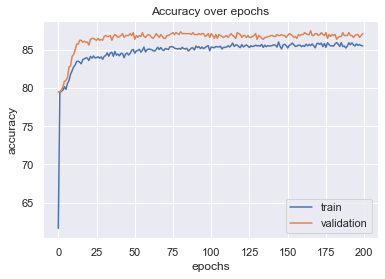

In [53]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [54]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.29572767]
 [0.22071445]
 [0.19559735]
 [0.05812448]
 [0.11317214]]


In [56]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:8])

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


#### Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1532   63]
 [ 208  197]]


In [58]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.45 % of testing data was classified correctly


###### Note:
    At 86.5% Test Accuracy, the Neural Network performance is satisfactory.
    
    It is good to note that, Neural Net with Dropout improves model accuracy significantly.

### 4.3 Finding out Which Features are more important using RandomForest Classifier

To know which input variables / columns / data attributes / features give us at least baseline accuracy, we use a RandomForestClassifier from sklearn package. 

We plot a feature importance graph as shown below. 

In [59]:
# One-Hot encoding our categorical attributes
list_cat = ['Geography', 'Gender']
training_data = pd.get_dummies(training_data, columns = list_cat, prefix = list_cat)

In [60]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
# We perform training on the Random Forest model and generate the importance of the features
X1 = training_data.drop('Exited', axis=1)
y1 = training_data.Exited
features_label = X1.columns

forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X1, y1)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X1.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.239710
 2) Age                            0.146917
 3) Tenure                         0.144480
 4) Balance                        0.141905
 5) NumOfProducts                  0.128330
 6) HasCrCard                      0.083883
 7) IsActiveMember                 0.039977
 8) EstimatedSalary                0.020773
 9) Geography_France               0.018094
10) Geography_Germany              0.009943
11) Geography_Spain                0.008848
12) Gender_Female                  0.008590
13) Gender_Male                    0.008551


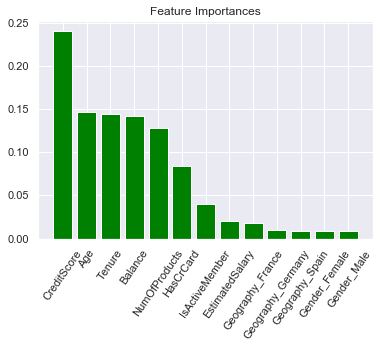

In [62]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X1.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X1.shape[1]), features_label, rotation = 55)
plt.show()

##### Note:
    The most important features to consider are Credit Score, Age, Tenure, Balance and the 
    Number of products one has with the Bank.
    
    According to above graph, these features can determine if a Customer Churns or not.

### 4.4 Testing Other Machine Learning Algorithms for Comparison
    K-Nearest Neighbor (KNN)
    Logistic Regression (LR)
    AdaBoost
    Gradient Boosting (GB)
    RandomForest (RF)

In [63]:
# Import selected models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

In [64]:
X1 = training_data.drop('Exited', axis=1)
y1 = training_data.Exited

#### 4.4.1 Splitting The Dataset

In [65]:
# Splitting the dataset in training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, 
                                                        y1, 
                                                        test_size = 0.2)

#### 4.4.2 Model fitting

##### 1. KNN Model Fitting

In [66]:
# Initialization of the KNN
knMod = KNeighborsClassifier(n_neighbors = 5, 
                             weights = 'uniform', 
                             algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data 
knMod.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##### 2. Logistic Regression Model Fitting

In [67]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, 
                           fit_intercept = True,
                           intercept_scaling = 1, class_weight = None, 
                           random_state = None, solver = 'liblinear', max_iter = 100,
                           multi_class = 'ovr', verbose = 2)

# Fitting the model with training data 
lrMod.fit(X1_train, y1_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

##### 3. AdaBoost Classifier Model Fitting

In [68]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, 
                            n_estimators = 200, 
                            learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(X1_train, y1_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

##### 4. Gradient Boosting Classifier Model Fitting

In [69]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)

# Fitting the model with training data 
gbMod.fit(X1_train, y1_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

##### 5. Random Forrest Classifier Model Fitting

In [70]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')

# Fitting the model with training data 
rfMod.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 4.4.3 Testing the baseline model
Testing the trained models performance against a validation set. The metrics we use are the mean accuracy score and the AUC-ROC score.


##### 1. KNN Model Testing

In [71]:
# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X1_test, y1_test)

# Return probability estimates for the test data
test_labels = knMod.predict_proba(X1_test)[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y1_test, test_labels , average = 'macro', sample_weight = None)

In [72]:
X1_test.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2130          704   45       6       0.00              1          1   
3112          698   40       7  105061.74              3          1   
9163          608   47       6       0.00              1          1   
9090          809   39       5       0.00              1          1   
6365          743   48       5  118207.69              2          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
2130               1        137739.45                 1                  0   
3112               0        107815.31                 1                  0   
9163               1        126012.57                 1                  0   
9090               0         77705.75                 1                  0   
6365               0        186489.14                 0                  0   

      Geography_Spain  Gender_Female  Gender_Male  
2130                0              1            0  
3112                0              1            0  
9163                0              1            0  
9090                0              1            0  
6365                1              1            0

In [73]:
test_labels

array([0.2, 0.2, 0.4, ..., 0.2, 0. , 0.4])

##### 2. Logistic Regression Model Testing

In [74]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X1_test, y1_test)

# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X1_test.values))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y1_test, test_labels , average = 'macro', sample_weight = None)

##### 3. AdaBoost Model Testing

In [75]:
# Compute the model accuracy on the given test data and labels
ada_acc = adaMod.score(X1_test, y1_test)

# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X1_test.values))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y1_test, test_labels , average = 'macro')

##### 4. Gradient Boosting Model Testing

In [76]:
# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X1_test, y1_test)

# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X1_test.values))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(y1_test, test_labels , average = 'macro')

##### 5. RF Model Testing

In [77]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X1_test, y1_test)

# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X1_test.values))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y1_test, test_labels , average = 'macro')

## 5.0 Model Evaluation

##### 5.1 All Models with Base Line Performance

In [78]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

accuracy   roc_auc
KNN                    0.7715  0.544396
Logistic Regression    0.7885  0.689359
AdaBoost               0.8645  0.855762
GradientBoosting       0.8640  0.872927
Random Forest          0.8540  0.817868

#### 5.2 ROC-AUC performance for the models

In [79]:
fpr_knn, tpr_knn, _ = roc_curve(y1_test, knMod.predict_proba(np.array(X1_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y1_test, lrMod.predict_proba(np.array(X1_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y1_test, adaMod.predict_proba(np.array(X1_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y1_test, gbMod.predict_proba(np.array(X1_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y1_test, rfMod.predict_proba(np.array(X1_test.values))[:,1])

#### Ploting The Receiver Operator Characteristic (ROC) Curve 

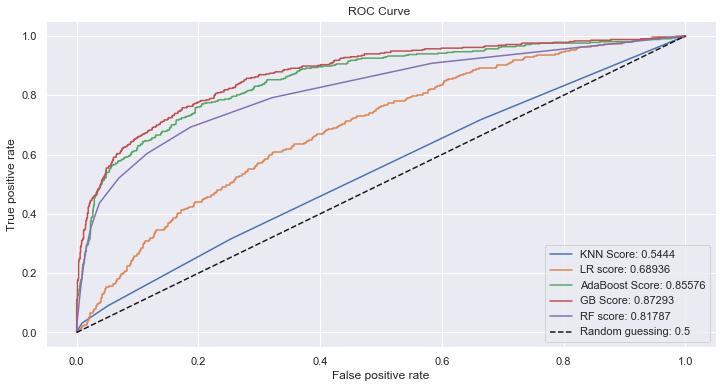

In [80]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

The ROC-AUC score, is more significant for us because the mean accuracy score considers only one threshold value, whereas the ROC-AUC score takes into consideration all possible threshold values and gives us the score. *score()* function of scikit-learn, which give us the mean accuracy score.

*Note:*

    GradientBoosting score of 0.86 and AdaBoost 0.83 classifiers show high ROC-AUC score on the validation dataset. 
    Other classifiers, such as logistic regression, KNN, and RandomForest do not perform well on the validation set. 
    
Therefore we shall fine tune GradientBoosting and AdaBoost classifiers in order to improve their accuracy score.

We perform some parameter optimization in the following steps.

### 5.3 Hyperparameter Optimization

In this section, I will use the following techniques in order to improve the accuracy of the classifiers :
*  Cross-validation
*  Hyperparameter tuning

With Cross Validation, instead of splitting the valuable training data into a separate training and validation set, I use KFold cross validation.

The models we shall tune are:

    - AdaBoost and
    - Gradient Boosting Machine

AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. It is also senstive to noisy data and outliers.

GBM is an ensemble method that works by training many individual learners, almost always decision trees where the trees are trained sequentially with each tree learning from the mistakes of the previous ones unlike in a random forest where the trees are trained in parallel. 

Since a GBM model has many hyperparameters with complex interactions between them, the only way to find the optimal hyperparameter values is to try many different combinations on a dataset. A range of hyperparameters that control both the overall ensemble (such as the learning rate) and the individual decision trees (such as the number of leaves in the tree or the maximum depth of the tree) is determined through a random search.

The performance of each set of hyperparameters is determined by Receiver Operating Characteristic Area Under the Curve (ROC AUC) from the cross-validation

Here, we can use the Scikit-Learn functions RandomizedSearchCV or GridSearchCV.



### Implementing a cross-validation based approach
To implement K-folds cross-validation, we use the K value = 5

In [81]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X1_train = X1, y1_train = y1, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X1_train, y1_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [82]:
mod = [knMod, lrMod, adaMod, gbMod, rfMod]
cvD = cvDictGen(mod, scr = 'roc_auc')
cvD

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'KNeighborsClassifier': [0.532941795209413, 0.015143901787688084],
 'LogisticRegression': [0.6751669339025831, 0.009073271676466613],
 'AdaBoostClassifier': [0.8441075841841352, 0.004784942283619017],
 'GradientBoostingClassifier': [0.8645172374722965, 0.00526804334052041],
 'RandomForestClassifier': [0.8132284696707478, 0.005063282676717107]}

###### Note:

Based on the mean value and the standard deviation value, we can conclude that our ROC-AUC score does not deviate much, so we are not suffering from the overfitting issue.

### Performing Some hyperparameter tuning using Cross Validation
I use *RandomizedSearchCV* and *GridSearchCV* hyperparameter tuning method. 

*Stacking Random and Grid Search*

For a smarter implementation of hyperparameter tuning I combine random search and grid search as follows:

    1. Use random search with a large hyperparameter grid
    2. Use the results of random search to build a focused hyperparameter grid around the best performing hyperparameter values.
    3. Run grid search on the reduced hyperparameter grid.
    4. Repeat grid search on more focused grids until maximum computational/time budget is exceeded.

The following steps help in obtaining optimal values for the parameters. 


In [89]:
# Import methods
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### AdaBoost Hyper Parameter Tuning

In [84]:
# Possible parameters
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [85]:
gridSearchAda = RandomizedSearchCV(estimator = adaMod, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc')
gridSearchAda.fit(X1_train, y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=200,
                                                random_state=None),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [86]:
# Display the best parameters and the score
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50}, 0.8396894633248454)

**AdaBoost after hyper parameter tuning output optimal value is 84.7% from previous 83.4%.**

### GradientBoosting Hyper Parameter Tuning

In [87]:
# Possibles parameters
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [88]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X1_train, y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [90]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 4, 'n_estimators': 113}, 0.8625893906068889)

**GradientBoosting after hyper parameter tuning output optimal value has remained same at 86.2%.**

## Train models with help of new hyper parameter
Here we are going to use the optimal parameter values that we got from the hyperparameter tuning.

In [91]:
# GradientBoosting with the optimal parameters
bestGbModFitted = gridSearchGB.best_estimator_.fit(X1_train, y1_train)

In [92]:
# AdaBoost with the optimal parameter
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X1_train, y1_train)

In [93]:
functions = [bestGbModFitted, bestAdaModFitted]
cvDictbestpara = cvDictGen(functions, scr = 'roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.8659084606614427, 0.004886715663028511],
 'AdaBoostClassifier': [0.8477872913444262, 0.004262494490522928]}

In [94]:
# Getting the score GradientBoosting
test_labels = bestGbModFitted.predict_proba(np.array(X1_test.values))[:,1]
roc_auc_score(y1_test,test_labels , average = 'macro', sample_weight = None)

0.8704058855928389

In [95]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X1_test.values))[:,1]
roc_auc_score(y1_test,test_labels , average = 'macro', sample_weight = None)

0.8574533398633876

### 5.4 Further Optimization Using Feature Engineering 

Since hyper parameter tuning has not improved models much, we try transformation of features. Then use ensemble technique (a voting mechanism) in order to generate the final probability of the prediction on the actual test dataset so that we can get the best accuracy score.


### Feature transformation (Feature engineering)
We will apply standard scaler/log transformation to our training dataset. The reason behind this is that we have some attributes that are very skewed and some data attributes that have values that are more spread out in nature. 

In [96]:
# Import the log transformation method
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [97]:
transformer = FunctionTransformer(np.log1p)
scaler = StandardScaler()
X_train_1 = np.array(X1_train)
#X_train_transform = transformer.transform(X_train_1)
X_train_transform = scaler.fit_transform(X_train_1)

In [98]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y1_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y1_train)

In [99]:
cvDictbestpara_transform = cvDictGen(functions = [bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.865871594499021, 0.004927452225163777],
 'AdaBoostClassifier': [0.8477872913444262, 0.004262494490522928]}

In [100]:
# For the test set
X_test_1 = np.array(X1_test)
#X_test_transform = transformer.transform(X_test_1)
X_test_transform = scaler.fit_transform(X_test_1)

In [101]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y1_test,test_labels , average = 'macro', sample_weight = None)

0.8702411085224837

### Voting-based ensemble model
In this section, we will use a voting-based ensemble classifier. So, we implement a voting-based machine learning model for both untransformed features as well as transformed features. Let's see which version scores better on the validation dataset.

#### For Transformed Data

In [102]:
# Import the voting-based ensemble model
from sklearn.ensemble import VotingClassifier

In [103]:
# Initialization of the model
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)],
                                         voting = 'soft', weights = [2,1])
# Fitting the model
votingMod = votingMod.fit(X_train_transform, y1_train)

In [104]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]
votingMod.score(X_test_transform, y1_test)

0.868

In [105]:
# The roc_auc score
roc_auc_score(y1_test, test_labels , average = 'macro', sample_weight = None)

0.8705042941209676

#### For Untransform Data

In [106]:
# Initialization of the model
votingMod_old = VotingClassifier(estimators = [('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting = 'soft', weights = [2,1])
# Fitting the model
votingMod_old = votingMod.fit(X1_train, y1_train)

In [107]:
test_labels = votingMod_old.predict_proba(np.array(X1_test.values))[:,1]
votingMod.score(X1_test, y1_test)

0.8665

In [108]:
# The roc_auc score
roc_auc_score(y1_test,test_labels , average = 'macro', sample_weight = None)

0.8704394512923558

###### Results:

As per industry standards, the best generalized approximation of churn problem in Banking sector is 87%, which compares well with our achieved Accuracy Score of 86.7% and ROC AUC value of 87%.

Artificial Neural Network performance was impressive at 86.7% Accuracy and very comparative to AdaBoost and GradientBoosting Classifiers both at 85%.

## 6.0 Deployment

##### Note:
    Not included in this report.

## 7.0 Conclusion

##### Observations:

    1. Female customers are the most likely to churn, 
    2. Customers that are located in Germany are the most churned, and also 
    3. Customers using only one product are the most churned. 
    
##### Results:
         
After building several models, I ended up with three very promising ones namely:
    
    Keras Neural Network with Dropout,
    GradientBoosting and 
    AdaBoost 
    
which performed better than KNN and Random Forest. 
            
    This will allow to choose the best model.
    
    I compared several algorithms which included random forest, KNN, AdaBoost, GradientBoosting and neural networks for the same. The accuracy of both the AdaBoost and GradientBoosting algorithms are comparable to the Neural Networks , hence it is hard to tell which is better. 
    
    I dicided to tune the hyper parameter for AdaBoost and GradientBoosting by implemented a voting-based approach as their initial performance was low but better than KNN and RF.
    
    Neural Network with dropout has proven to be a great algorithm if the dataset is well prepared and clean. AdaBoost and GradientBoosting required hyper parameter tuning but less preprocessing and the training process is also much simpler. 
    
    This shows with more hyper-parameter tuning neural networks will yield higher performance than both.
    
    Since the problem is about binary classification with a imbalance dataset, we have used the most efficient metric for model performance which is the ROC-AUC score and the model achieved about  87%  accuracy.   
      
    This score compares very well as per industry standards on Banking Churn prediction rates. The model can achieve better performance providing a lot of historical data for the training phase.
    
    
##### Recommendations:
    
    In this project, I demonstrated how a business can predict customers likely to exit. With this information, a customer retension plan can be more effective and less costly as its targeted to a specific group.

Although Churn Prediction models do a great job at predicting which custoers may churn, Single models have challenges in solving the problem at hand. The fact that:

    1. No clarity about customer value: A churn prediction model doesn't tell you which of the identified at-risk customers is more valuable. In this scenario, your retention agents end up giving costly offers to low-value customers
    
    2. No insight into the context of risk: Not knowing why a particular customer would want to cancel in the first place makes it harder to know what to do to retain them.
          
    3. It doesn't allow timely and proactive engagement: Models don't provide information on time aspect to know when a predicted high-risk customer will cancel and therefore Marketers can't prioritize their planning on who to target first.
    
    4. The lost opportunity of customer winback: Winning back lost customers is more profitable than new customer acquisition. The single model approach will only predict the risk status of active customers and won't even consider winback chances of recently canceled customers.
    
    Since multiple factors drive a customer's desire to cancel, the objective of predicting churn analytics should go from identifying who is most likely to cancel to understanding finer and subtler details like why customers will cancel, when will they cancel, how valuable these customers are, what can be done to save them, what offers might work for them and which of the canceled customers can be won back.
    
    I therefore recommend a Multimodel approach each predicting different dimensions of customer behavior to target various aspects of the problem.
     

In [ ]:
%reset -f